In [2]:
#https://www.deepset.ai/german-word-embeddings =>
#https://int-emb-glove-de-wiki.s3.eu-central-1.amazonaws.com/vectors.txt
# 4GB, containing 1.3 MIO (!) tokens in 300Dims => filter for10% most common words

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from src.embedding import Embedding

### load embedding

In [4]:
glove_de_path = '../data/GloVe_vectors_de.txt'

In [5]:
glove_embedding_de = Embedding(language='de', path_list=[glove_de_path])

1309281it [01:03, 20534.97it/s]


total number of entries found:  1309281. Dimension: 300


In [14]:
print(len(glove_embedding_de.word2vec))
print(glove_embedding_de.word2vec['der'][:8])

1309281
[-0.28062   0.74426   0.257364 -0.070038 -0.07914  -0.134922  0.418708
  0.373415]


In [26]:
print(glove_embedding_de.embedding.shape)
print(type(glove_embedding_de.embedding))
print(glove_embedding_de.embedding.loc['der'])

(1309281, 300)
<class 'pandas.core.frame.DataFrame'>
0     -0.280620
1      0.744260
2      0.257364
3     -0.070038
4     -0.079140
         ...   
295   -0.044910
296    0.159463
297   -0.414500
298    0.046645
299    0.069972
Name: der, Length: 300, dtype: float32


In [27]:
print(len(glove_embedding_de.index_to_word))
print(glove_embedding_de.index_to_word[0])

1309281
der


### load german corpus

In [28]:
#https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists#German =>
#https://invokeit.wordpress.com/frequency-word-lists/ =>
#https://raw.githubusercontent.com/hermitdave/FrequencyWords/master/content/2016/de/de_50k.txt

In [29]:
corpus_path = '../data/de-top-50k.txt'
with open (corpus_path) as file:
    lines=file.readlines()

In [30]:
splitted_lines = [line.split() for line in lines]

In [31]:
df_frequencies = pd.DataFrame(splitted_lines)
df_frequencies.columns = ['word', 'frequency']
df_frequencies.head()

,word,frequency
0,ich,3699605
1,sie,2409949
2,das,1952794
3,ist,1920535
4,du,1890181


In [64]:
df_frequencies['frequency'] = df_frequencies.frequency.apply(lambda x: int(x))

<AxesSubplot:>

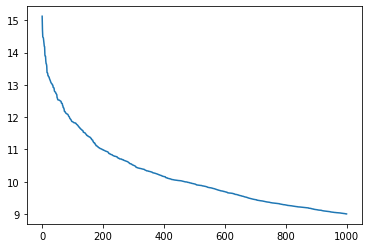

In [65]:
# super long tail
import numpy as np
np.log(df_frequencies['frequency'].iloc[:1000]).plot()

In [66]:
# define top n

In [67]:
N_most_frequent = 50000 # only keep X most frequent words

In [68]:
# these will be kept
print(df_frequencies.iloc[:N_most_frequent].tail(8))

                word  frequency
49992        ohrwurm         40
49993           jano         40
49994   gummistiefel         40
49995  scheinheilige         40
49996           koko         40
49997        scherst         40
49998          emsig         40
49999      schwermut         40


In [99]:
frequent_words = set(df_frequencies.iloc[:N_most_frequent]['word'])

In [100]:
len(frequent_words)

50000

In [101]:
possible_words = set(filtered_embedding.index)
len(possible_words)

1309281

In [116]:
# only keep words that are frequent and in index of embedding
words_to_keep = list(frequent_words & possible_words)
len(words_to_keep)

46996

In [122]:
print(len(frequent_words - set(words_to_keep))) # these are dismissed
print(list(frequent_words - set(words_to_keep))[:8])

3004
['liebesgeschichten', 'erist', 'krankenschwestern', 'telefoniere', 'poobare', 'berufungsgericht', 'junuh', 'menschheitsgeschichte']


In [123]:
# filter 

In [124]:
filtered_embedding = glove_embedding_de.embedding.copy()

In [125]:
filtered_embedding = filtered_embedding.loc(axis=0)[words_to_keep]

In [141]:
filtered_embedding

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
starke,-0.285092,-0.350144,0.066122,-0.059022,-0.074293,0.105105,-0.091429,-0.379363,-0.471944,-0.038044,...,-0.046795,0.486627,0.092285,0.394796,-0.386349,0.016992,0.315967,0.434802,-0.198200,-0.065318
mittagszeit,0.402801,-0.000529,-0.063135,-0.429702,0.059168,-0.181313,0.278056,-0.885087,-0.528817,0.113312,...,-0.310075,-0.564392,-0.512391,-0.061537,-0.261750,0.100853,0.032682,0.089461,0.310686,0.315627
östlichen,-0.404085,0.184555,-0.099343,0.224999,-0.547287,-0.232835,0.416266,0.546959,-0.405216,0.145357,...,-0.121708,-0.263284,0.427416,-0.200418,0.057937,0.020421,0.055736,0.313623,0.598803,0.050427
pumpen,0.366514,-0.275178,-0.337030,-0.311622,0.410426,0.021424,-0.228994,-0.634361,0.073496,-0.183064,...,0.279162,-0.570037,0.434501,0.387588,-0.044226,0.008883,-0.000685,0.623034,0.041198,0.156304
videomaterial,0.074707,-0.030806,-0.425025,-0.320975,0.097818,-0.086039,0.007920,-0.159249,0.564676,-0.091144,...,-0.086772,-0.206852,0.247326,0.037089,-0.422071,0.102761,-0.270570,-0.842040,-0.023887,0.114175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
überlistet,-0.114379,0.504258,0.234080,-0.000105,0.143114,0.033253,0.198351,-0.028485,-0.963998,0.307841,...,0.334652,-0.776330,0.419251,0.375681,0.355837,0.458123,0.153709,0.198869,0.065368,0.195081
south,-1.140673,0.402983,0.006067,-0.122824,0.175911,0.301749,0.419371,0.288409,-0.307948,-0.252508,...,-0.260434,-0.615820,-0.185277,-0.114288,0.208436,-0.424728,-0.707111,-0.155766,-0.435711,0.130045
nachher,0.059892,-0.092244,0.261324,-0.398008,0.213620,0.224522,-0.237254,0.031730,-0.274248,-0.027154,...,0.102771,-0.346859,0.299674,0.160099,-0.174631,0.149946,-0.133413,-0.010067,-0.032417,0.187507
ravic,0.291360,-0.067183,0.474839,0.227148,0.384928,0.005910,-0.241821,-0.099029,-0.068110,-0.015698,...,0.189107,0.018260,0.334480,-0.044291,-0.057996,-0.469963,-0.166111,0.150999,0.085222,0.116860


In [142]:
# write file

In [143]:
filtered_glove_path = f'../data/GloVe_vectors_de_{N_most_frequent}.txt'

In [147]:
filtered_embedding.to_csv(filtered_glove_path, sep=' ', index=True, header=None)

In [148]:
test = pd.read_csv(filtered_glove_path, sep=' ', index_col = 0)

In [149]:
test.head()

,-0.285092,-0.350144,0.066122,-0.059022,-0.074293,0.105105,-0.091429,-0.379363,-0.471944,-0.038044,...,-0.046795,0.486627,0.092285,0.394796,-0.386349,0.016992,0.315967,0.434802,-0.1982,-0.065318
starke,,,,,,,,,,,,,,,,,,,,,
mittagszeit,0.402801,-0.000529,-0.063135,-0.429702,0.059168,-0.181313,0.278056,-0.885087,-0.528817,0.113312,...,-0.310075,-0.564392,-0.512391,-0.061537,-0.261750,0.100853,0.032682,0.089461,0.310686,0.315627
östlichen,-0.404085,0.184555,-0.099343,0.224999,-0.547287,-0.232835,0.416266,0.546959,-0.405216,0.145357,...,-0.121708,-0.263284,0.427416,-0.200418,0.057937,0.020421,0.055736,0.313623,0.598803,0.050427
pumpen,0.366514,-0.275178,-0.337030,-0.311622,0.410426,0.021424,-0.228994,-0.634361,0.073496,-0.183064,...,0.279162,-0.570037,0.434501,0.387588,-0.044226,0.008883,-0.000685,0.623034,0.041198,0.156304
videomaterial,0.074707,-0.030806,-0.425025,-0.320975,0.097818,-0.086039,0.007920,-0.159249,0.564676,-0.091144,...,-0.086772,-0.206852,0.247326,0.037089,-0.422071,0.102761,-0.270570,-0.842040,-0.023887,0.114175
drohnenangriff,0.154013,0.036767,-0.500780,0.037943,0.176996,-0.766577,0.013525,-0.158913,-0.233881,0.112612,...,0.167733,-0.019649,-0.112561,-0.102391,-0.159352,-0.125168,-0.267933,0.141476,0.592589,-0.304352
